# Laboratorio #6
##Jhoan Londoño Restrepo
### Curso de aprendizaje estadístico

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

![iris](https://i.imgur.com/kYu11vT.png)

In [31]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [32]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in iris.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 

In [33]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#Analisis de la data
##Cantidad de valores nulos

In [26]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#Graficos
A continuación se grafica los histogramas de cada característica del data set con su respectivo diagrama de violín

In [17]:
plt.figure(figsize=(40,100))
for i,var in enumerate(iris.iloc[:, 0:4]):
  fig = px.histogram(iris, x=var, color="species", marginal="violin", hover_data=iris.columns, width=800, height=400)
  fig.show()

<Figure size 2880x7200 with 0 Axes>

#Matriz de correlación

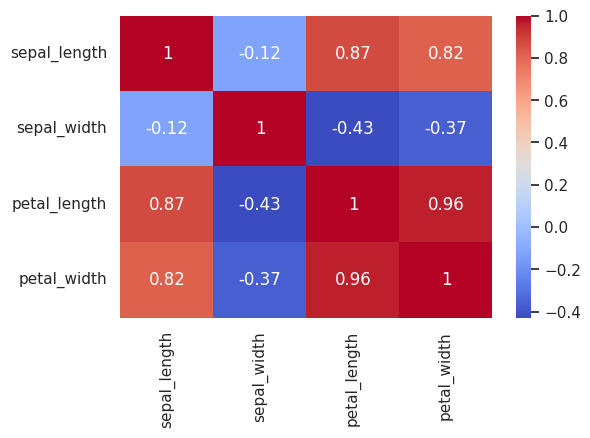

In [25]:
plt.figure(dpi=100)
df_cor=iris.corr()
sns.heatmap(df_cor,cmap="coolwarm", annot=True)

#Construcción del modelo 
Tomando 1 característica de clasificación petal lenght

In [63]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
X = iris[['petal_length']]
y = iris['species'].map({'versicolor': 0, 'setosa':1,"virginica": 0})

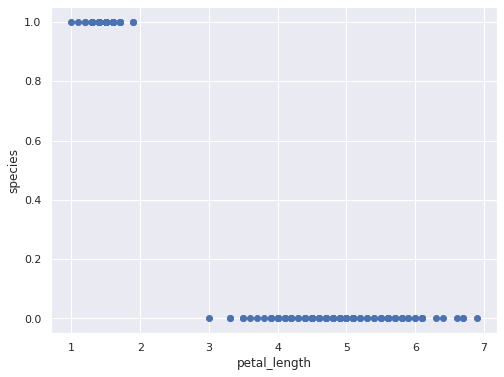

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('petal_length')
plt.ylabel('species');

In [66]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_clf = LogisticRegression().fit(X_train, y_train)

In [67]:
sgd_clf = SGDClassifier(loss = 'log', learning_rate='optimal', eta0=0.01).fit(X_train,y_train)

In [68]:
lr_clf.score(X_test, y_test), sgd_clf.score(X_test, y_test)

(1.0, 1.0)

In [69]:
lr_clf.decision_function(X_test)

array([ -5.57335912,   2.77976072, -11.69898035,  -5.01648447,
        -5.85179645,   3.33663538,  -2.51054851,  -6.68710844,
        -5.01648447,  -3.3458605 ,  -6.68710844,   3.61507271,
         3.89351004,   3.33663538,   3.33663538,  -5.57335912,
        -8.63616974,  -3.3458605 ,  -5.01648447,  -8.07929508,
         3.05819805,  -6.13023378,   3.05819805,  -8.07929508,
       -10.30679371,  -6.96554577,  -8.63616974,  -8.91460706,
         3.61507271,   3.05819805])

In [70]:
lr_clf.predict_proba(X_test)

array([[9.96216666e-01, 3.78333405e-03],
       [5.84277177e-02, 9.41572282e-01],
       [9.99991698e-01, 8.30221137e-06],
       [9.93415852e-01, 6.58414767e-03],
       [9.97133510e-01, 2.86648981e-03],
       [3.43355425e-02, 9.65664458e-01],
       [9.24878009e-01, 7.51219906e-02],
       [9.98754670e-01, 1.24533022e-03],
       [9.93415852e-01, 6.58414767e-03],
       [9.65969021e-01, 3.40309793e-02],
       [9.98754670e-01, 1.24533022e-03],
       [2.62095393e-02, 9.73790461e-01],
       [1.99669080e-02, 9.80033092e-01],
       [3.43355425e-02, 9.65664458e-01],
       [3.43355425e-02, 9.65664458e-01],
       [9.96216666e-01, 3.78333405e-03],
       [9.99822466e-01, 1.77534201e-04],
       [9.65969021e-01, 3.40309793e-02],
       [9.93415852e-01, 6.58414767e-03],
       [9.99690207e-01, 3.09793404e-04],
       [4.48648569e-02, 9.55135143e-01],
       [9.97828653e-01, 2.17134717e-03],
       [4.48648569e-02, 9.55135143e-01],
       [9.99690207e-01, 3.09793404e-04],
       [9.999665

In [71]:
lr_clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1])

Grafiquemos las predicciones del modelo

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



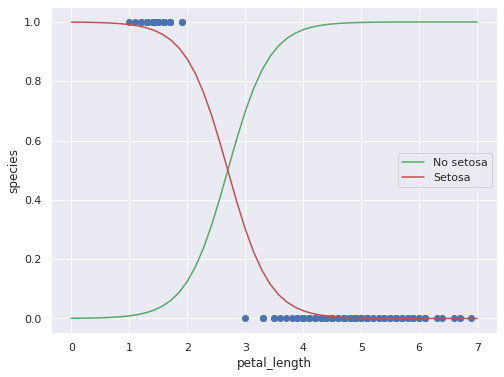

In [72]:
x = np.c_[np.linspace(0,7)]
y_prob = lr_clf.predict_proba(x)

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.plot(x, y_prob[:,0], 'g', label = 'No setosa')
plt.plot(x, y_prob[:,1], 'r', label = 'Setosa')
plt.xlabel('petal_length')
plt.ylabel('species')
plt.legend();

Para modelos lineales de regresión, la salida $\hat y$, es una función lineal de las características $X$: una línea, un plano o un hiperplano.

Para modelos lineales de clasificación, es la *frontera de decisión* la que es una función lineal de las entradas. En otras palabras, un clasificador binario lineal es un clasificador que separa dos clases utilizando una línea, un plano o un hiperplano.

Podemos obtener la frontera de decisión a partir de la hipótesis de la regresión logística:

\begin{equation}
h_w(X)  = \sigma(W^T \cdot X) =
\begin{cases}
 >0.5 & si & W^T \cdot X \geq 0 \\
 <0.5 & si & W^T \cdot X<0\\
\end{cases}\end{equation}

En nuestro caso, la frontera de decisión está dada por: $$X_{fd} = -\frac{w_0}{w_1}$$

In [73]:
w0 = lr_clf.intercept_
w1 = lr_clf.coef_

x_f = - w0 / w1
x_f

array([[2.69834341]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



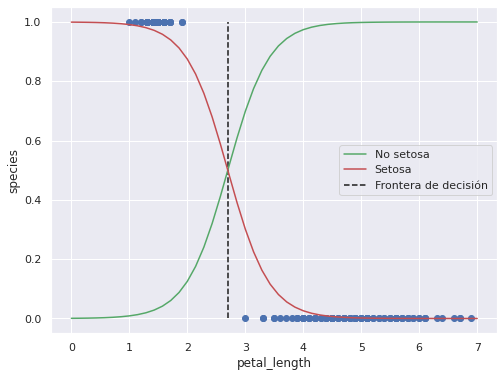

In [74]:
x = np.c_[np.linspace(0,7)]
y_prob = lr_clf.predict_proba(x)

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.plot(x, y_prob[:,0], 'g', label = 'No setosa')
plt.plot(x, y_prob[:,1], 'r', label = 'Setosa')
plt.vlines(x_f, 0,1,linestyles='--',  label = 'Frontera de decisión')
plt.xlabel('petal_length')
plt.ylabel('species')
plt.legend();

## Tomando 2 caracteristicas: Petal length y petal widht

In [53]:
X = iris[['petal_length', 'petal_width']]
y = iris['species'].map({'versicolor': 0, 'setosa':1,"virginica": 0})

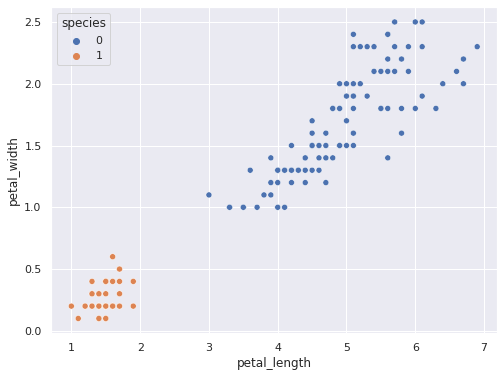

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = X, x = 'petal_length', y = 'petal_width', hue= y);

De nuevo, construyamos un modelo de clasificación, encadenando ahora la construcción del modelo con la estandarización de los datos

In [55]:
def lr_clf(**kwargs):
  return make_pipeline(StandardScaler(),
                       LogisticRegression(**kwargs))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lr_clf().fit(X_train, y_train)

Tenemos que $$\omega_0+\omega_1x_1+\omega_2x_2 = 0.$$

En este caso la frontera de decisión estará dada por $$x_2 = -\frac{1}{w_2}\left( w_0 + w_1x_1\right) $$

Podemos utilizar la librería `mlxtend` para obtener directamente la frontera de decisión:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



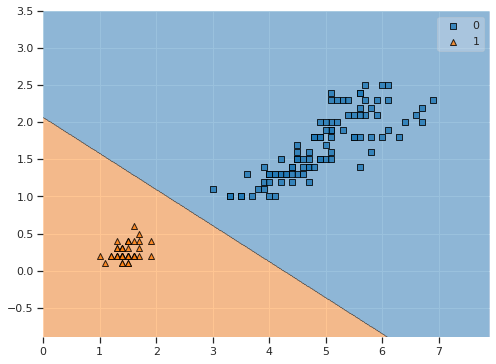

In [57]:
import mlxtend.plotting as mlx

plt.figure(figsize=(8,6))
mlx.plot_decision_regions(X.values, y.values, model)

La regresión logística aplica por defecto una regularización L2. El modelo no utiliza $\alpha$ directamente sino que utiliza el parámetro $C$ que es el inverso de $\alpha$: $$C= \frac{1}{\alpha}$$ Veamos cómo depende la frontera de decisión en función de este parámetro:

In [58]:
def CF(c):
  model = lr_clf(C = c).fit(X_train, y_train)

  plt.figure(figsize=(8,6))
  mlx.plot_decision_regions(X.values, y.values, model)

  plt.title(f"C: {c}\ntrain score: {model.score(X_train, y_train)}\ntest score: {model.score(X_test, y_test)}");

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning:

No contour levels were found within the data range.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with 

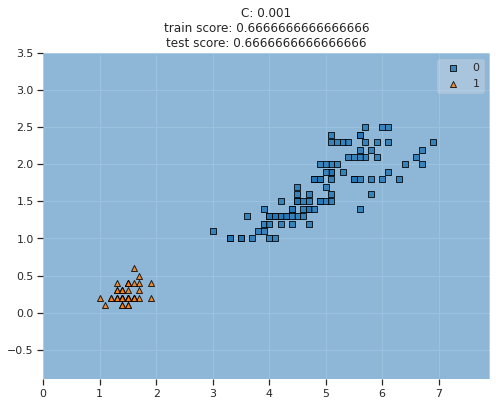

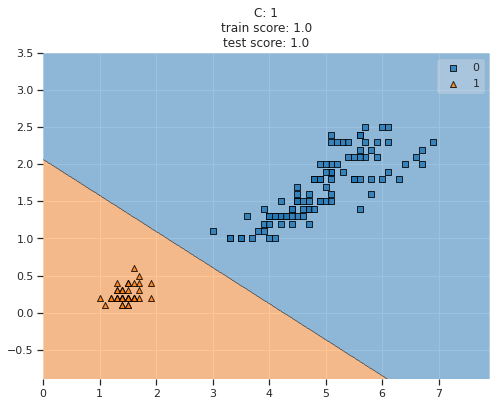

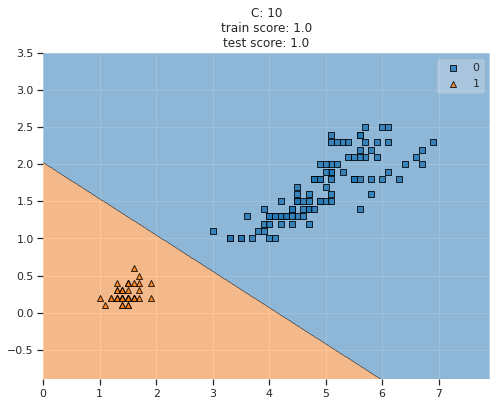

In [59]:
for c in [0.001,1, 10]:
  CF(c)

##Modelo para clasificación de todas las variables tomando 2 características

<p><a name="cla"></a></p>

# **Regresión logística multinomial (Softmax)**

Mientras que los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases. Algunos algoritmos son capaces de manejar varias clases directamente. Otros son clasificadores estrictamente binarios. Sin embargo, existen varias estrategias que se pueden utilizar para realizar una clasificación multiclase utilizando varios clasificadores binarios:

 * OVA (one vs all)
 * OVO (one vs one)

El modelo de regresión logística se puede generalizar para admitir varias clases directamente, sin tener que entrenar y combinar varios clasificadores binarios. Este se conoce como Regresión logística multinomial o Regresión Softmax

La idea es simple: dada una instancia $x$, la regresión Softmax comienza calculando un puntaje $s_k(x)$ para cada clase $k$

$$s_k(X) = W_k^{T} \cdot X$$

Note que cada clase tiene su propio vector de parámetros $W_k$. Una vez se han calculado los puntajes de cada clase para la instancia $x$, se puede estimar la probabilidad $p_k$ de que la instancia pertenezca a la clase $k$ pasando el puntaje la *función softmax*:

\begin{eqnarray}
\sigma (s_k) = \frac{\exp(s_k(X))}{\sum_j^{k} \exp(s_k)}
\end{eqnarray}

Al igual que la regresión logística, la regresión Softmax predice la clase con la probabilidad estimada más grande, que es simplemente la clase con el puntaje más alto:

$$\hat y = \underset{k}{\text{argmax}} \: \: \sigma (s_k)$$

Ahora que sabemos cómo el modelo estima las probabilidades y hace las predicciones, veámos cómo es el entrenamiento: El objetivo es tener un modelo que estime una alta probabilidad para la clase objetivo (y consecuentemente una baja probabilidad para las otras clases). La siguiente función de costo, conocida como la *entropia cruzada*, logrará dicho objetivo dado que penaliza el modelo cuando este estima una baja probabilidad para la clase objetivo

\begin{eqnarray}
J(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_k^{i} \log(h_k^i)
\end{eqnarray}

Note que cuando solo hay dos clases (k=2), esta función de costo es equivalente a la función de costo de la regresión logistica, la *log-loss*.

Construyamos el modelo de clasificación multinomial:


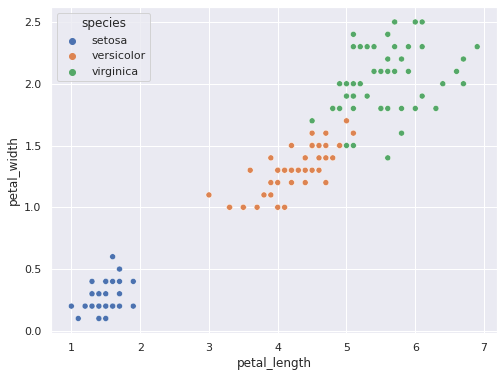

In [75]:
X = iris[['petal_length', 'petal_width']]
y = iris['species'].map({'setosa': 0, 'versicolor': 1, "virginica": 2})
plt.figure(figsize=(8,6))
sns.scatterplot(data = iris, x ='petal_length', y = 'petal_width', hue= 'species');

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), 
                      LogisticRegression(multi_class='multinomial')).fit(X_train, y_train)

In [77]:
model.predict_proba(X_test)

array([[1.72131562e-02, 8.62095590e-01, 1.20691254e-01],
       [9.29807766e-01, 7.01851181e-02, 7.11601086e-06],
       [3.86524164e-07, 6.47046858e-03, 9.93529145e-01],
       [9.61374781e-03, 7.35363978e-01, 2.55022275e-01],
       [7.92372257e-03, 7.38533201e-01, 2.53543076e-01],
       [9.33152945e-01, 6.68392955e-02, 7.75914106e-06],
       [6.88109110e-02, 8.85227018e-01, 4.59620712e-02],
       [4.76433958e-05, 5.84402865e-02, 9.41512070e-01],
       [9.61374781e-03, 7.35363978e-01, 2.55022275e-01],
       [5.72034373e-02, 8.96707114e-01, 4.60894488e-02],
       [2.74504880e-04, 1.64902933e-01, 8.34822563e-01],
       [9.70554212e-01, 2.94448407e-02, 9.47648003e-07],
       [9.67784011e-01, 3.22146431e-02, 1.34548099e-06],
       [9.66108600e-01, 3.38901634e-02, 1.23625394e-06],
       [9.46554032e-01, 5.34417499e-02, 4.21774062e-06],
       [4.63480592e-03, 6.01314337e-01, 3.94050857e-01],
       [1.37000349e-05, 3.66012275e-02, 9.63385072e-01],
       [7.25270216e-02, 8.96157

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



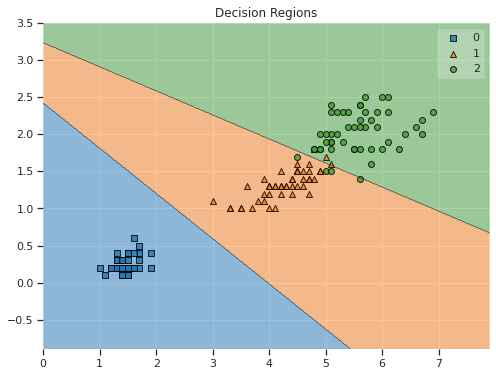

In [85]:
plt.figure(figsize=(8,6))
mlx.plot_decision_regions(X.values, y.values, model)

plt.title("Decision Regions");

La grafica no permite poner los ejes pero recordemos que en el eje x se encuentra petal lenght, en el eje y se encuentra petal widht y las características se representan así: Setosa: Azul, Versicolor:Naranja, Virginica:Verde